In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve,confusion_matrix,classification_report,accuracy_score

In [ ]:
df=pd.read_csv(r"/content/train.csv")

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [ ]:
corr_df = df.corr()
corr_df['Survived'].sort_values(ascending=False)

<ipython-input-13-e743359fa5c8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = df.corr()


Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.077221
Pclass     -0.338481
Name: Survived, dtype: float64

In [ ]:
df['family_size'] = df['SibSp'] + df['Parch']

In [ ]:
corr_df = df.corr()
corr_df['Survived'].sort_values(ascending=False)

<ipython-input-15-e743359fa5c8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = df.corr()


Survived       1.000000
Fare           0.257307
Parch          0.081629
family_size    0.016639
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [ ]:
df.drop(['SibSp','Parch'],axis=1,inplace=True)

In [ ]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'family_size'], dtype='object')

<ipython-input-18-c0250f16d424>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


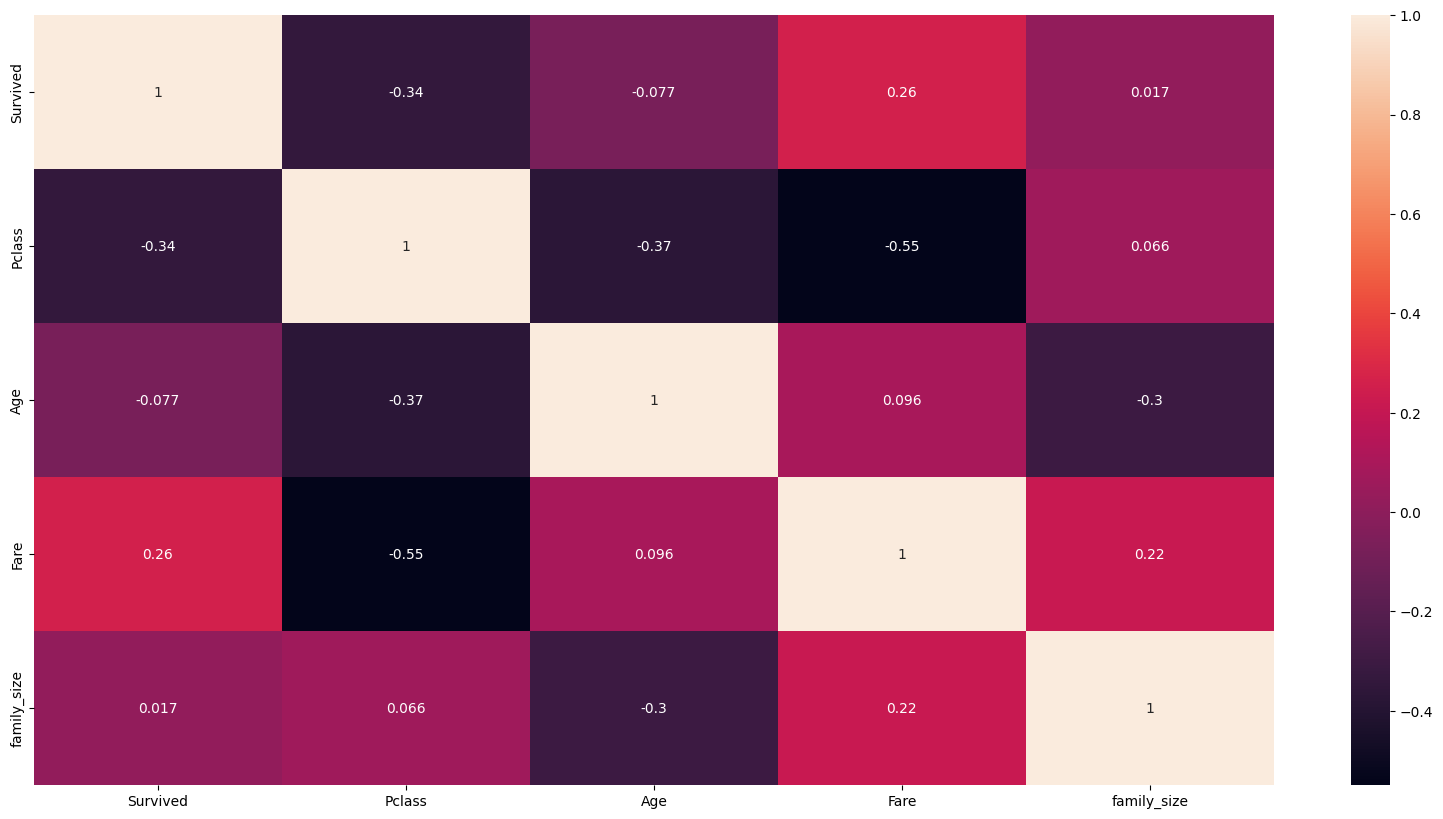

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
df["Age"].replace(np.nan,df["Age"].mean(),inplace=True)

In [ ]:
df["Fare"].replace(np.nan,df["Fare"].median(),inplace=True)

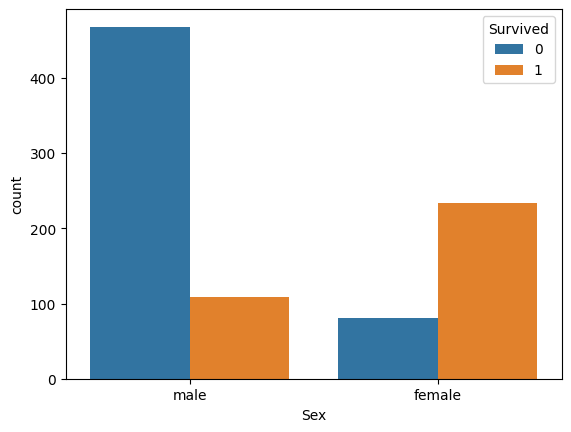

In [ ]:
sns.countplot(data=df,x='Sex',hue='Survived')
plt.show()

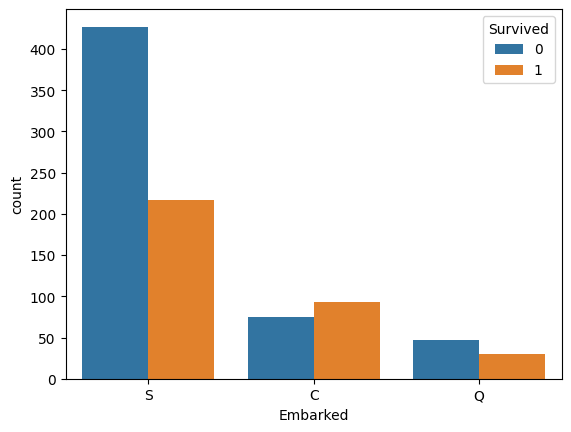

In [ ]:
sns.countplot(data=df,x='Embarked',hue='Survived')
plt.show()

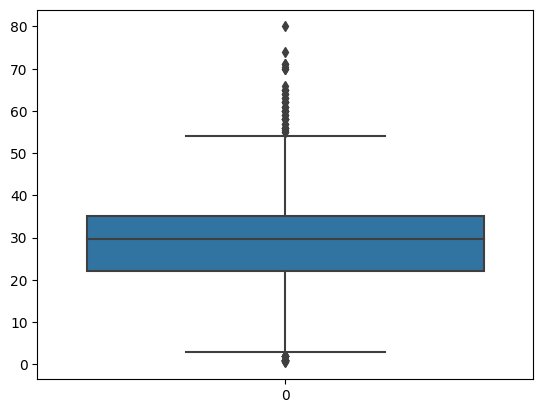

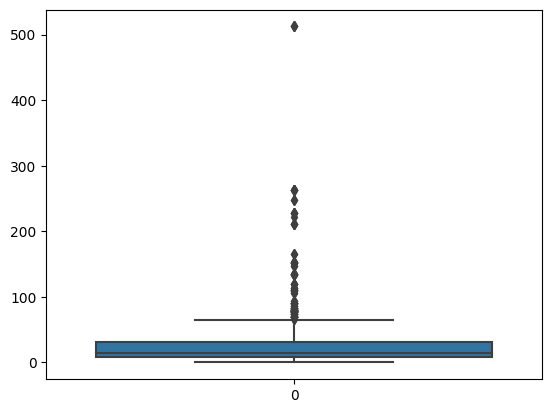

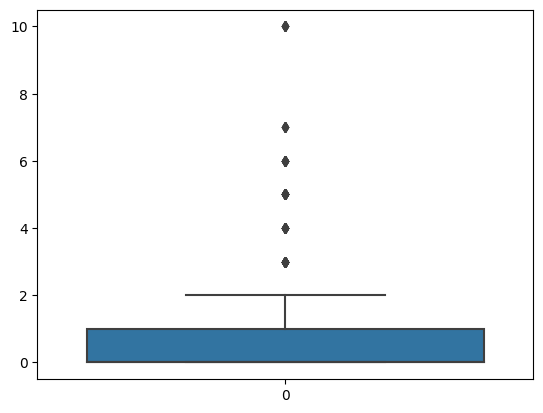

In [ ]:
A=["Age","Fare","family_size"]
for i in A:
    sns.boxplot(df[i])
    plt.show()

In [ ]:
def qlr(B):
    Q1=B.quantile(0.25)
    Q3=B.quantile(0.75)
    IQR=Q3-Q1
    lr=Q1-1.5*IQR
    ur=Q3+1.5*IQR
    print(lr,ur)

In [ ]:
qlr(df["Age"])

2.5 54.5


In [ ]:
df.loc[df["Age"] < 3.875, "Age"] = np.nan


In [ ]:
df["Age"].replace(np.nan,df["Age"].mean(),inplace=True)

In [ ]:
df["Age"].isnull().sum()

0

In [ ]:
for i in df["Age"]:
    if i>54.875:
        df["Age"]=df["Age"].replace(i,np.nan)

In [ ]:
df["Age"].replace(np.nan,df["Age"].mean(),inplace=True)

In [ ]:
qlr(df["Fare"])

-26.724 65.6344


In [ ]:
for i in df["Fare"]:
    if i>66.8359875:
        df["Fare"]=df["Fare"].replace(i,np.nan)

In [ ]:
df["Fare"].replace(np.nan,df["Fare"].mean(),inplace=True)

In [ ]:
df["Fare"].isnull().sum()

0

In [ ]:
df["Fare"].isnull().sum()

0

In [ ]:
for i in df["family_size"]:
    if i>2.5:
        df["family_size"]=df["family_size"].replace(i,np.nan)

In [ ]:
df["family_size"].replace(np.nan,df["family_size"].mean(),inplace=True)

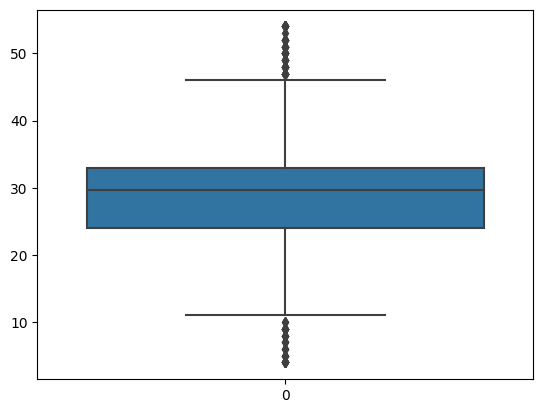

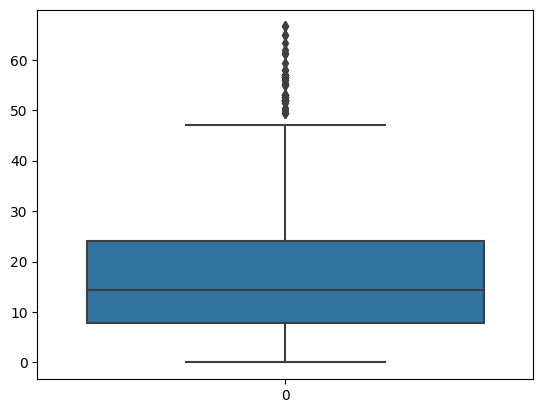

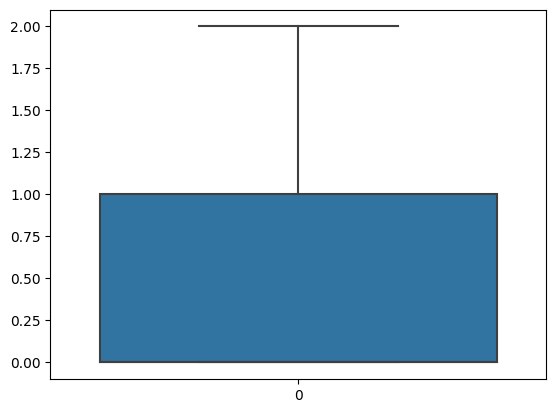

In [ ]:
A=["Age","Fare","family_size"]
for i in A:
    sns.boxplot(df[i])
    plt.show()

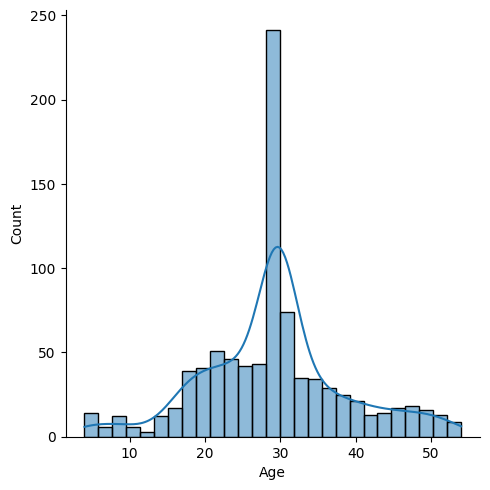

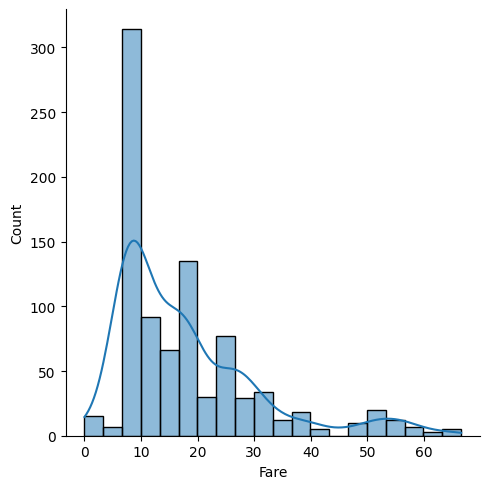

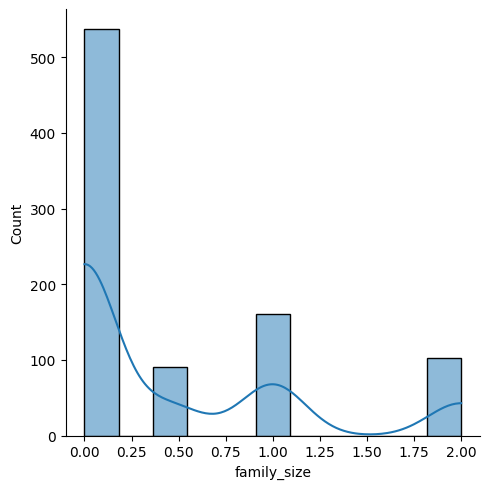

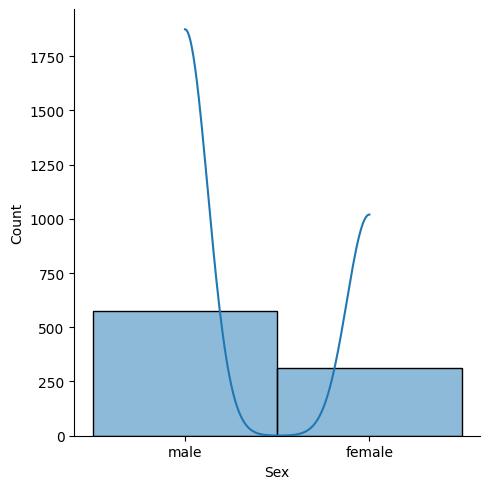

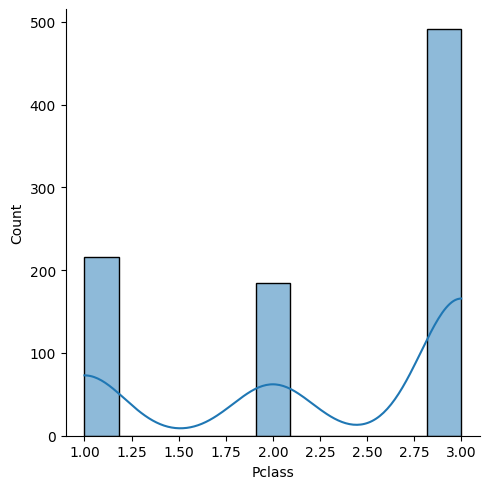

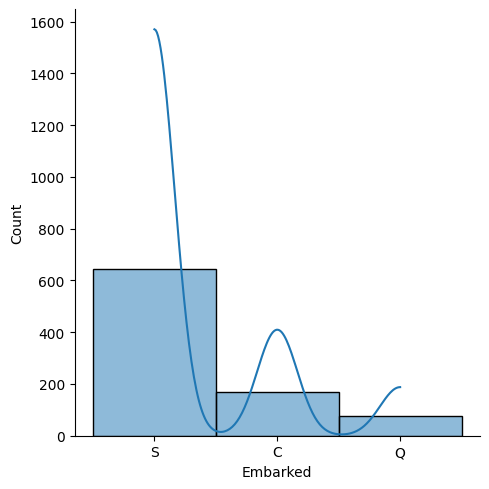

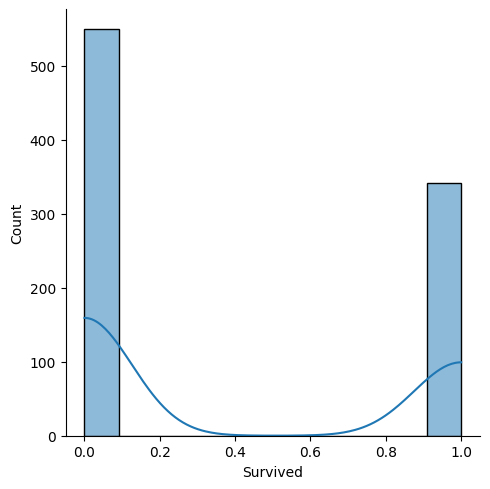

In [ ]:
B=["Age","Fare","family_size","Sex","Pclass","Embarked","Survived"]
for i in B:
    sns.displot(df[i],kde=True)
    plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
ln=LabelEncoder()

In [ ]:
C=["Sex","Embarked"]
for i in C:
    df[i]=ln.fit_transform(df[i])

In [ ]:
df

,Survived,Pclass,Sex,Age,Fare,Embarked,family_size
0,0,3,1,22.000000,7.250000,2,1.00000
1,1,1,0,38.000000,17.947645,0,1.00000
2,1,3,0,26.000000,7.925000,2,0.00000
3,1,1,0,35.000000,53.100000,2,1.00000
4,0,3,1,35.000000,8.050000,2,0.00000
...,...,...,...,...,...,...,...
886,0,2,1,27.000000,13.000000,2,0.00000
887,1,1,0,19.000000,30.000000,2,0.00000
888,0,3,0,29.699118,23.450000,2,0.45625
889,1,1,1,26.000000,30.000000,0,0.00000


In [ ]:
x=df.drop("Survived",axis=1)
x

,Pclass,Sex,Age,Fare,Embarked,family_size
0,3,1,22.000000,7.250000,2,1.00000
1,1,0,38.000000,17.947645,0,1.00000
2,3,0,26.000000,7.925000,2,0.00000
3,1,0,35.000000,53.100000,2,1.00000
4,3,1,35.000000,8.050000,2,0.00000
...,...,...,...,...,...,...
886,2,1,27.000000,13.000000,2,0.00000
887,1,0,19.000000,30.000000,2,0.00000
888,3,0,29.699118,23.450000,2,0.45625
889,1,1,26.000000,30.000000,0,0.00000


In [ ]:
y=df["Survived"]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.head(5)

,Pclass,Sex,Age,Fare,Embarked,family_size
331,1,1,45.5,28.5000,2,0.00000
733,2,1,23.0,13.0000,2,0.00000
382,3,1,32.0,7.9250,2,0.00000
704,3,1,26.0,7.8542,2,1.00000
813,3,0,6.0,31.2750,2,0.45625


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()

In [ ]:
df

,Survived,Pclass,Sex,Age,Fare,Embarked,family_size
0,0,3,1,22.000000,7.250000,2,1.00000
1,1,1,0,38.000000,17.947645,0,1.00000
2,1,3,0,26.000000,7.925000,2,0.00000
3,1,1,0,35.000000,53.100000,2,1.00000
4,0,3,1,35.000000,8.050000,2,0.00000
...,...,...,...,...,...,...,...
886,0,2,1,27.000000,13.000000,2,0.00000
887,1,1,0,19.000000,30.000000,2,0.00000
888,0,3,0,29.699118,23.450000,2,0.45625
889,1,1,1,26.000000,30.000000,0,0.00000


In [ ]:
lr.fit(x_train, y_train)


LinearRegression()

In [ ]:
y_pred=lr.predict(x_test)

In [ ]:
print("train accuracy :",lr.score(x_train,y_train))
print("test accuracy: ",lr.score(x_test,y_test))
print("Mean squared error: ",mean_squared_error(y_test,y_pred))
print("R squared",r2_score(y_test,y_pred))

train accuracy : 0.3705713915060951
test accuracy:  0.4088004430688157
Mean squared error:  0.14336695350817083
R squared 0.4088004430688157
